# Problem Statement

1. Analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions.
2. Understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men?

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import norm

In [3]:
# Importing the data in two different variables
df = pd.read_csv('walmart_data.csv') # for making changes
df_org = pd.read_csv('walmart_data.csv') # to refer to original dataframe

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


# Basic metrics

In [5]:
# Checking shape of dataset and other basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [6]:
# Checking number of unique values in each column
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

- There are 5,50,068 rows and 10 columns in the data.
- There are no null values.
- The columns user_id, occupation(masked), marital_status, product_category and purchase have integer datatype.
- Rest of the columns(product_id, gender, age, city_category, stay_in_current_city_years) are object datatype.
- The columns gender, age, city_category, stay_in_current_city_years and marital status can be converted into category datatype.

In [7]:
# Converting some features to categorical data type
temp = ['Gender','Age','City_Category','Stay_In_Current_City_Years','Marital_Status']
for i in temp:
    df[i] = df[i].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  int64   
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  int64   
 9   Purchase                    550068 non-null  int64   
dtypes: category(5), int64(4), object(1)
memory usage: 23.6+ MB


In [8]:
# Getting statistical summary of numerical data
df.describe()

,User_ID,Occupation,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,5.404270,9263.968713
std,1.727592e+03,6.522660,3.936211,5023.065394
min,1.000001e+06,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,20.000000,23961.000000


- Range of purchase amount is 12 dollars to 23961 dollars.
- Mean purchase amount is 9264 dollars.
- Median purchase amount is 8047 dollars.
- Standard deviation of purchase amount is 5023 dollars.
- Inter quartile range of purchase amount is 5823 to 12054 dollars.

# Value Counts and Unique Attributes

In [9]:
# Finding value counts for columns 1-5
for i in df.columns[:5]:
    print('Value counts for column',i,'-')
    print(df[i].value_counts())
    print('-'*50)

Value counts for column User_ID -
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1000094       7
1002111       7
1004991       7
1005608       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64
--------------------------------------------------
Value counts for column Product_ID -
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00062342       1
P00305542       1
P00142542       1
P00309642       1
P00008942       1
Name: Product_ID, Length: 3631, dtype: int64
--------------------------------------------------
Value counts for column Gender -
M    414259
F    135809
Name: Gender, dtype: int64
--------------------------------------------------
Value counts for column Age -
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64
--------------------------------------------------
Value counts f

In [10]:
# Finding value counts for columns 6-10
for i in df.columns[5:]:
    print('Value counts for column',i,'-')
    print(df[i].value_counts())
    print('-'*50)

Value counts for column City_Category -
B    231173
C    171175
A    147720
Name: City_Category, dtype: int64
--------------------------------------------------
Value counts for column Stay_In_Current_City_Years -
1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64
--------------------------------------------------
Value counts for column Marital_Status -
0    324731
1    225337
Name: Marital_Status, dtype: int64
--------------------------------------------------
Value counts for column Product_Category -
5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64
--------------------------------------------------
Value counts for column Purchase -
7011     191
7193     188
6855     187
6891   

- Most frequent users have made close to 1000 purchases.
- Least frequent users have made 6 or 7 purchases.
- 'P00265242' is the most sold product.
- 414,259 users in the dataset are male and 135,809 female.
- People in age group 26-35 make more purchases than any other age group.
- Peole of city category B make more purchases than other city city categories.
- People who have stayed in their city for only one year make more purchases than others.
- People who have stayed for less than a year or more than 4 years make least number of purchases.
- Unmarried people make more puchases than married peole.
- Product categories 5, 1 and 8 sell more than other categories.
- Product categories 17 and 9 sell the least.

Insights -
- Walmart can keep products like P00265242 and P00025442 (which are selling a lot) in the inventory. Products like P00056342       P00350742 (which are not selling) need not be kept in store.
- Ads can be targetted towards people of age group 26-35, since they are making maximum purchases. Walmart can also include new products required by people of this age group.
- Ads can be targetted towards people of city category B. Inventory in these cities can be replenished.
- Ads can be targetted towards people who have spent between 1 to 2 years in their cities.
- Ads can be targetted towards unmarried people.
- Products of categories 1, 5 and 8 can be kept in inventory as well as made easily visible in the stores.

In [11]:
# Retreiving unique values in each column
for i in df.columns:
    print('Unique values in column {x} -'.format(x=i))
    print(df[i].unique())
    print('Number of unique values -',df[i].nunique())
    print('-'*50)

Unique values in column User_ID -
[1000001 1000002 1000003 ... 1004113 1005391 1001529]
Number of unique values - 5891
--------------------------------------------------
Unique values in column Product_ID -
['P00069042' 'P00248942' 'P00087842' ... 'P00370293' 'P00371644'
 'P00370853']
Number of unique values - 3631
--------------------------------------------------
Unique values in column Gender -
[F, M]
Categories (2, object): [F, M]
Number of unique values - 2
--------------------------------------------------
Unique values in column Age -
[0-17, 55+, 26-35, 46-50, 51-55, 36-45, 18-25]
Categories (7, object): [0-17, 55+, 26-35, 46-50, 51-55, 36-45, 18-25]
Number of unique values - 7
--------------------------------------------------
Unique values in column Occupation -
[10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
Number of unique values - 21
--------------------------------------------------
Unique values in column City_Category -
[A, C, B]
Categories (3, object):

- There are 5891 unique customers.
- 3631 unique products.
- 2 genders
- 7 age groups
- 21 occupations
- 3 city categories
- 5 number of years stayed in current city
- 2 marital status
- 20 product categories
- 18105 purchase amounts

# Missing Values and Outlier Detection

In [12]:
# Finding outliers using IQR method
for i in ['Purchase']:
    outliers = []
    p25 = np.percentile(df[i], 25)
    p75 = np.percentile(df[i], 75)
    iqr = p75 - p25
    max_cut = p75 + iqr*1.5
    min_cut = max(0, p25 - iqr*1.5)
    outliers = df.loc[(df[i]<min_cut) | (df[i]>max_cut),i]
    print('Outliers for the column',i,'-')
    print(outliers)
    print('Number of outliers-', len(outliers))
    print('Percentage of outliers =', round((len(outliers)/len(df[i]))*100,2),'%')
    

Outliers for the column Purchase -
343       23603
375       23792
652       23233
736       23595
1041      23341
          ...  
544488    23753
544704    23724
544743    23529
545663    23663
545787    23496
Name: Purchase, Length: 2677, dtype: int64
Number of outliers- 2677
Percentage of outliers = 0.49 %


Purchase columns contains 2677 outliers. This is 0.49% of total number of entries.

In [13]:
# Checking for missing values
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

There are no missing values in any column.

# Visual Analysis

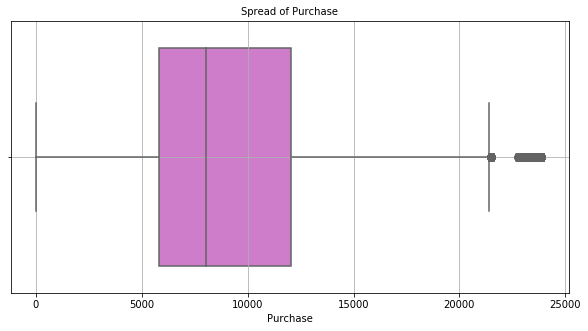

In [14]:
# Creating boxplot for 'Purchase'
temp = ['Purchase']
plt.figure(figsize = (10,5))
for i in range(len(temp)):
#     plt.subplot(1,3,i+1)
    sns.boxplot(x = df[temp[i]],color = 'orchid')
    plt.title('Spread of {feature}'.format(feature = temp[i]), fontsize = 10)
    plt.grid()
plt.show()

- Median purchase is about 8000 dollars.
- There are many outliers.
- Inter Quartile Range is 6000 to 12000 dollars.

Insight-
- Offers/rewards can be given on purchases above 12000 dollars to nudge customers to make more purchases.

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """
C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """
C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: 

`di

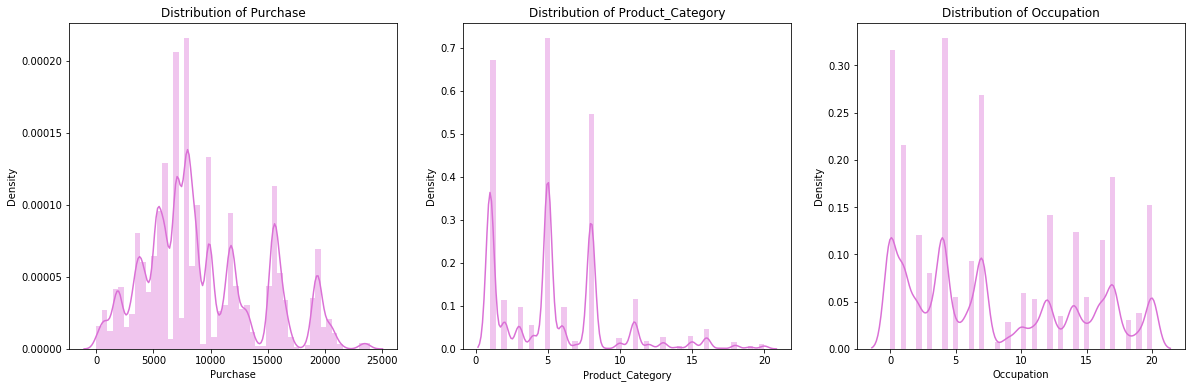

In [15]:
# Creating distribution plots for purchase, product category and occupation
temp = ['Purchase', 'Product_Category', 'Occupation']
plt.figure(figsize=(20,6))
for i in range(len(temp)):
    plt.subplot(1,3,i+1)
    sns.distplot(df[temp[i]], color='orchid')
    plt.title('Distribution of {feature}'.format(feature = temp[i]))

plt.show()

- Purchase amounts between 5000 to 10000 are maximum in number.
- Purchase amounts range between 0 and 25000.
- Product categories 1, 5 and 8 are most frequently purchased.
- There are 20 product categories.
- People with occupations 0, 4 and 7 make more purchase than other occupations.
- There are 21 different occupations.

Insights-
- More products popular among people with occupations 0, 4 and 7 can be kept in store.


In [16]:
# Creating bins of purchase amount
df['purchase_bins'] = pd.cut(df['Purchase'], bins = [0,5000,10000,15000,20000,25000])

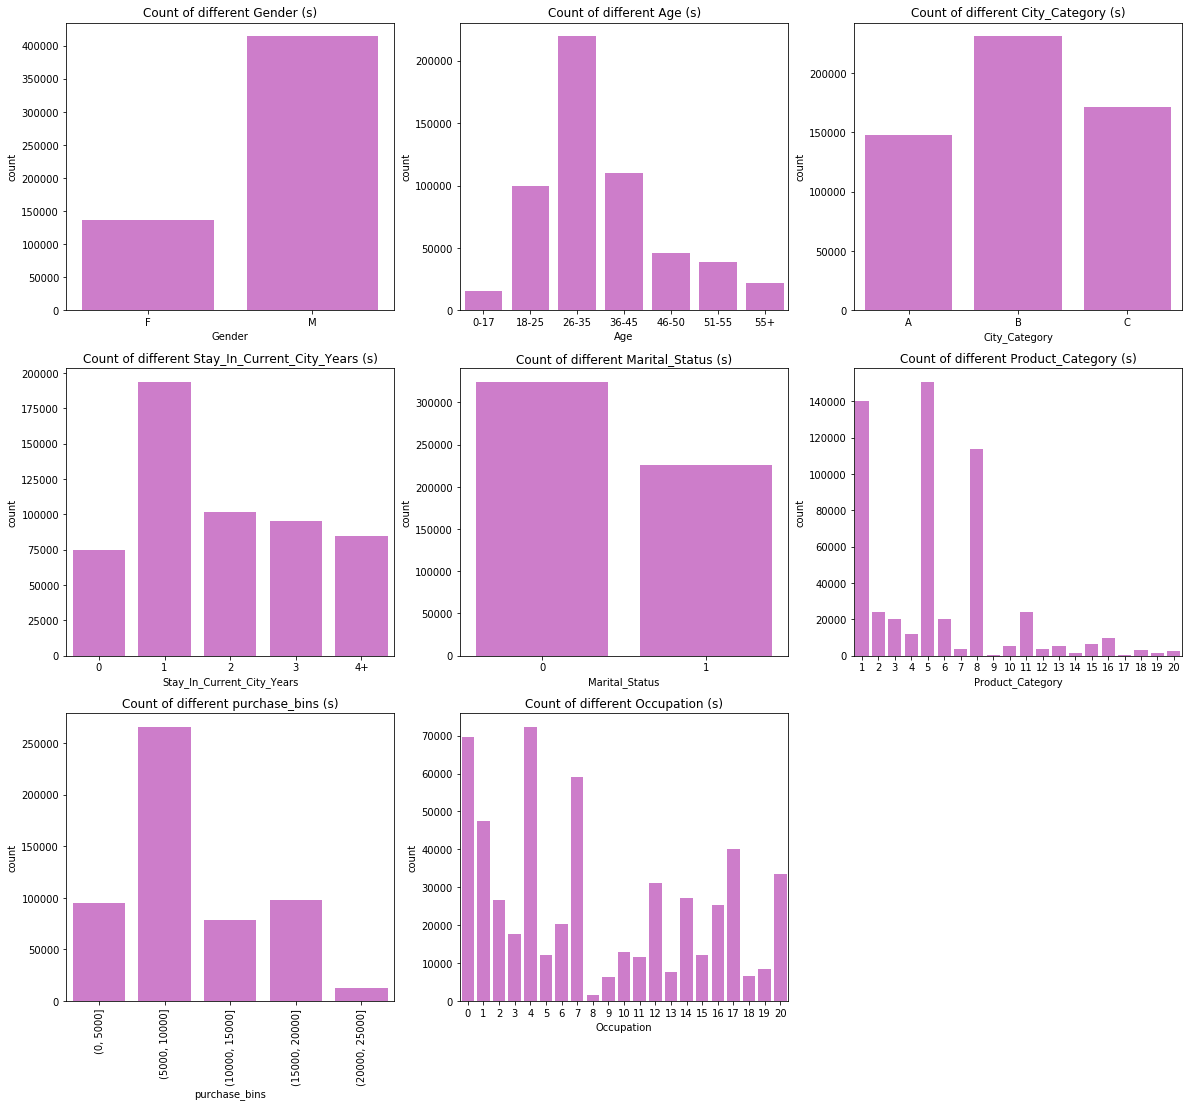

In [17]:
# Creating count plots for categorical variables
plt.figure(figsize = (20,18))
temp = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years','Marital_Status', 'Product_Category', 'purchase_bins', 'Occupation']
for i in range(len(temp)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x = df[temp[i]], color = 'orchid')
    plt.title('Count of different {temp_i} (s)'.format(temp_i = temp[i]))
    if temp[i] in ['purchase_bins']:
        plt.xticks(rotation = 90)
plt.show()

- More puchases have been made by males than females.
- People of age group 26-35 have made the maximum number of purchases.
- People in cities of category B have made maximum number of purchases.
- People who have stayed in their city for a year have made the maximum number of purchases.
- Unmarried people have made more purchases than married peole.
- Products of category 1, 5 and 8 sold most frequently.
- Purchase of amount (5000, 10000] were maximum in number.
- People of occupation 0,4 and 7 have made more purchases than other occupations.
- People of occupation 8 have made least purchases.

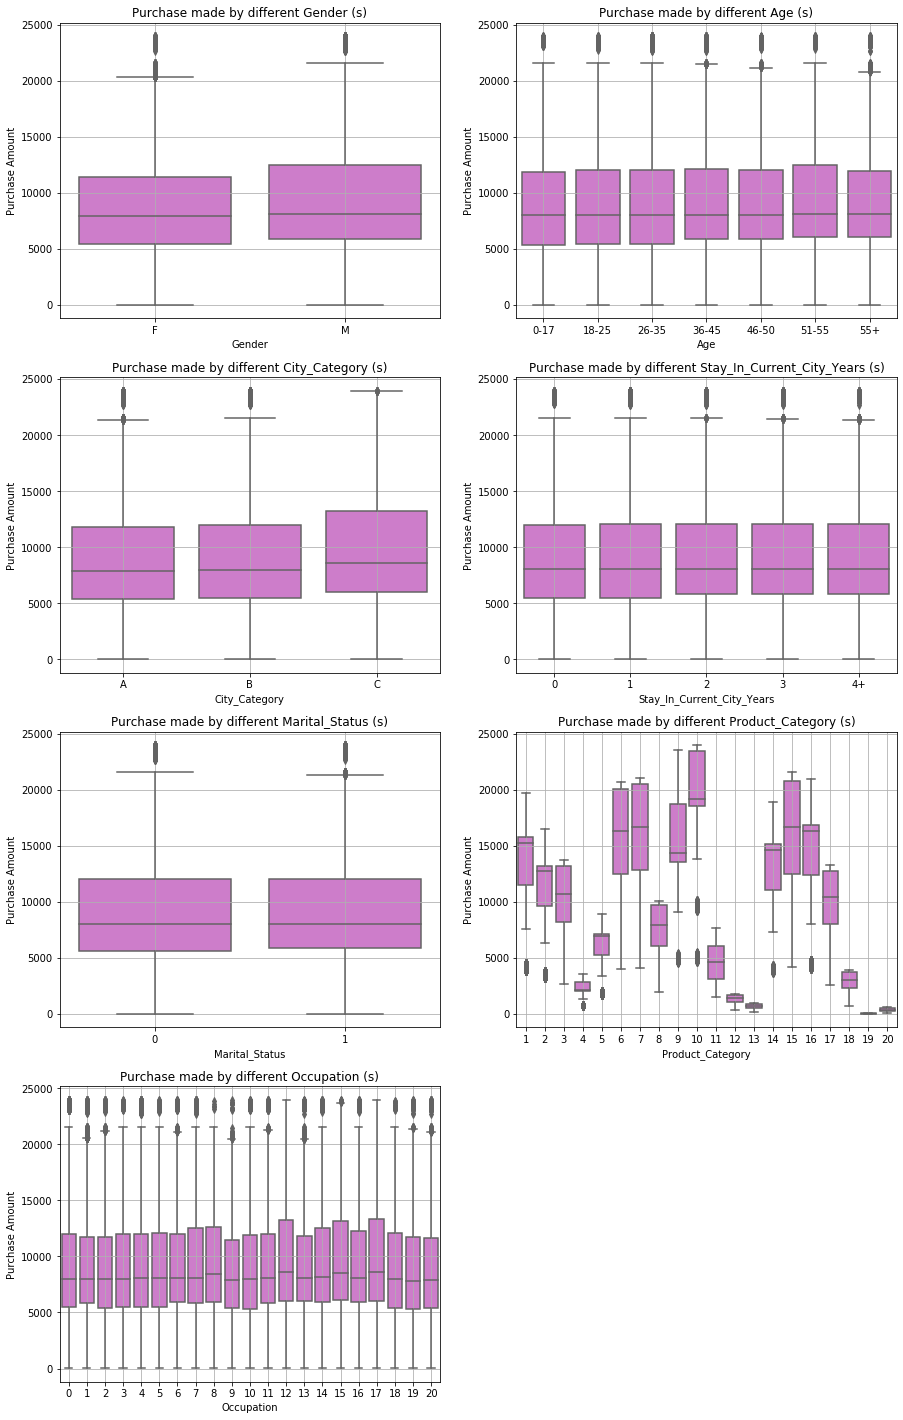

In [18]:
# Creating bi-variate boxplots (purchase vs categorical-variable)
plt.figure(figsize = (15,25))
temp = ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years','Marital_Status', 'Product_Category','Occupation']
for i in range(len(temp)):
    plt.subplot(4, 2, i+1)
    sns.boxplot(x = df[temp[i]], y = df['Purchase'], color = 'orchid')
    plt.title('Purchase made by different {temp_i} (s)'.format(temp_i = temp[i]))
    plt.ylabel('Purchase Amount')
    plt.grid()
plt.show()

- Median purchase amounts of males and females are similar.
- Median purchase amounts of all age groups are similar.
- Median purchase amount of city of category C is slightly higher than other city categories.
- Median purchase amounts of product category 10 is highest, category 19 is lowest.
- Median purchase amount of occupations 12 and 17 are slightly higher than other occupations.

Insights-
- Ads for slightly expensive products can be targetted towards people with occupation 12 and 17. (See median expenses of all occupations below)

Converting Gender, Age and City_Category to numeric data-

In [20]:
# Creating a copy of the dataframe to keep the new numeric data
df_copy = df_org.copy()
df_copy['Gender'].replace({'F' : 1, 'M': 0}, inplace = True)
df_copy['Age'].replace({'0-17':1, '18-25':2,'26-35':3, '36-45':4,'46-50':5,'51-55':6,'55+':7 }, inplace=True)
df_copy['City_Category'].replace({'A':1, 'B':2, 'C':3}, inplace=True)

In [21]:
# Finding pearson correlation between all the numerical features
df_copy.corr().round(2)

,User_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category,Purchase
User_ID,1.00,0.03,0.03,-0.02,0.02,0.02,0.00,0.00
Gender,0.03,1.00,0.00,-0.12,0.00,0.01,0.05,-0.06
Age,0.03,0.00,1.00,0.09,0.12,0.31,0.06,0.02
Occupation,-0.02,-0.12,0.09,1.00,0.03,0.02,-0.01,0.02
City_Category,0.02,0.00,0.12,0.03,1.00,0.04,-0.01,0.06
Marital_Status,0.02,0.01,0.31,0.02,0.04,1.00,0.02,-0.00
Product_Category,0.00,0.05,0.06,-0.01,-0.01,0.02,1.00,-0.34
Purchase,0.00,-0.06,0.02,0.02,0.06,-0.00,-0.34,1.00


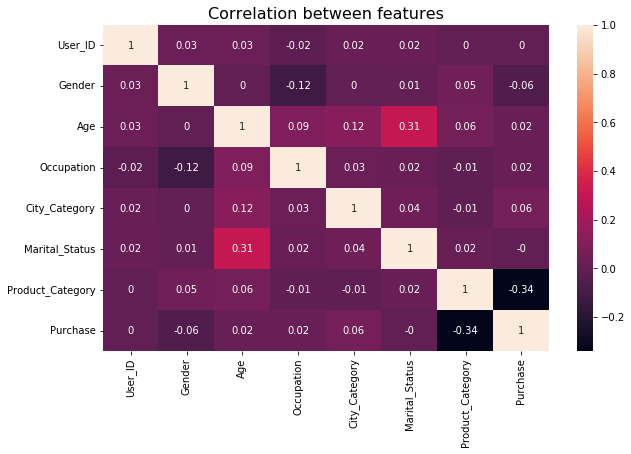

In [22]:
# Plotting heatmap for the correlation values calculated above
plt.figure(figsize = (10,6))
sns.heatmap(df_copy.corr().round(2), annot = True)
plt.title('Correlation between features', fontsize = 16)
plt.show()

- We don't see a strong correlation of purchase with any feature.
- There's a weak negative correlation between product category and purchase amount.
- Weak positive correlation between age and marital status.

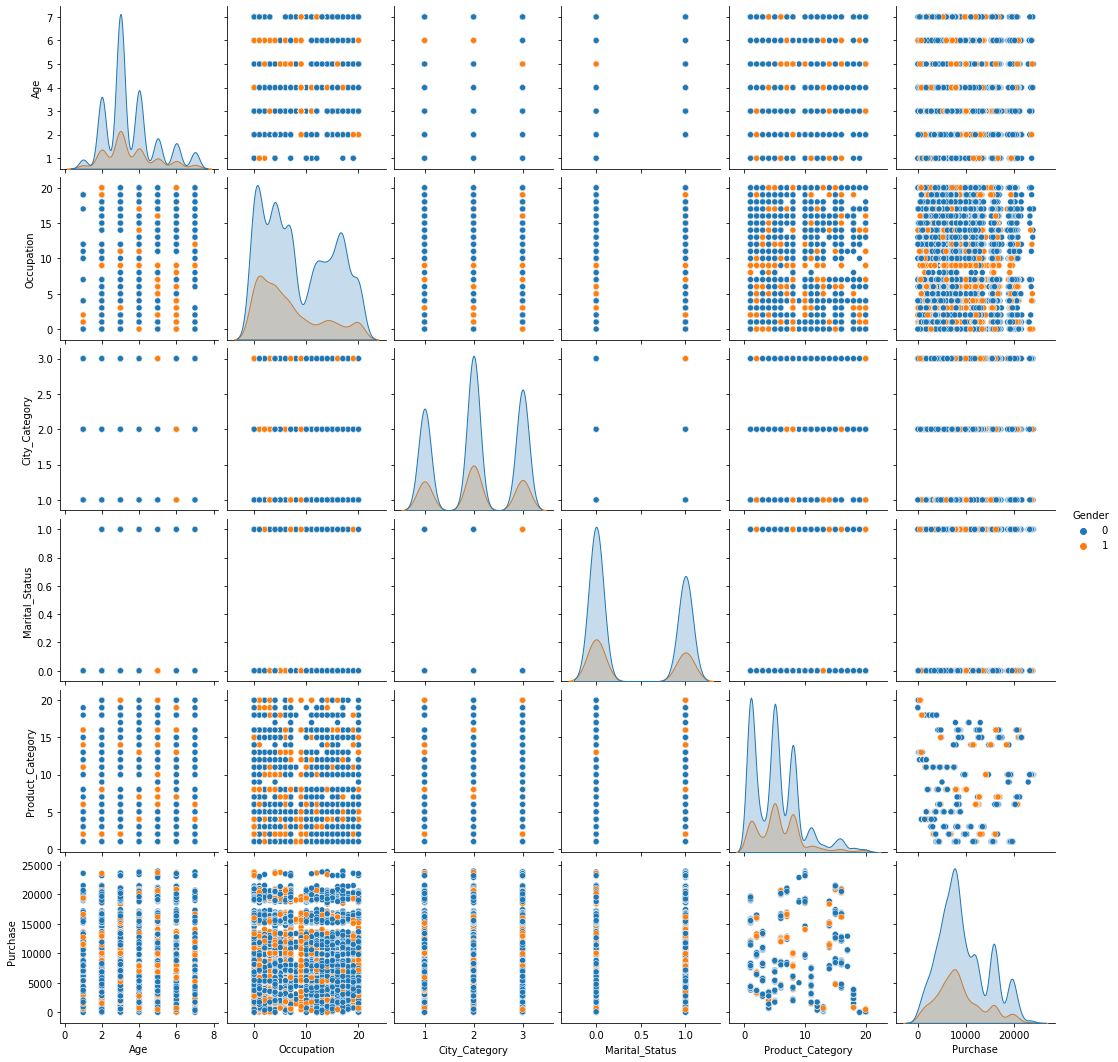

In [23]:
# Taking a sample of 10000 entries to create pairplots
# Blue color dots are male. Orange are female.
sns.pairplot(df_copy.sample(10000).iloc[:,1:], hue = 'Gender', diag_kind = 'kde')
plt.show()

- Both males and females of city category B make more purchases compared to city categories A and C.
- Females purchase products of category 4, 11, 15, 17 and 18 less often.
- Most popular product category among males is 1.
- Most popular product category among females is 5. It is popular among male customers as well.
- Females with occupation 0-10 made more purchases than females with occupations 11-20.

### Sampling-

1. Male and Female users

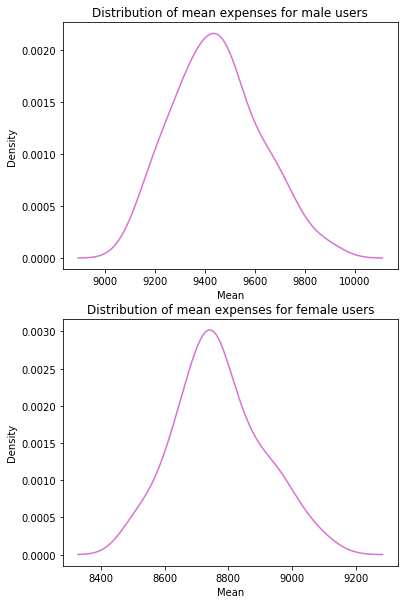

In [24]:
# Taking samples of 1000 entries for both genders and
# Creating kde plots to check if it appears gaussian.
plt.figure(figsize=(6,10))
x = 1
for j in ['M','F']:
    means = []
    for i in range(100):
        temp = df.loc[df['Gender']==j,'Purchase'].sample(1000)
        avg = temp.mean()
        means.append(avg)
    plt.subplot(2,1,x)
    sns.kdeplot(x = means, color = 'orchid')
    if j == 'M':
        gen = 'male'
        means_m = means
    else:
        gen = 'female'
        means_f = means
    plt.title('Distribution of mean expenses for {g} users'.format(g = gen), fontsize = 12)
    plt.xlabel('Mean')
    x += 1
plt.show()

In [25]:
# Finding different confidence intervals for males and females
for i in ['males', 'females']:
    print('For {g}-'.format(g = i))
    if i == 'males':
        means = means_m
        gen = 'M'
    else:
        means = means_f
        gen = 'F'
    print('Mean of sample means =',np.mean(means))
    print('Population mean =', np.mean(df.loc[df['Gender']==gen, 'Purchase']))
    print('Standard deviation of means (Standard Error) =', np.std(means))
    print('Standard deviation of population =',df.loc[df['Gender']==gen, 'Purchase'].std() )
    print('99% CONFIDENCE INTERVAL for mean expense by {g} users-'.format(g = i))
    print((np.percentile(means, 0.5).round(2), np.percentile(means, 99.5).round(2)))
    print('95% CONFIDENCE INTERVAL for mean expense by {g} users-'.format(g = i))
    print((np.percentile(means, 2.5).round(2), np.percentile(means, 97.5).round(2)))
    print('90% CONFIDENCE INTERVAL for mean expense by {g} users-'.format(g = i))
    print((np.percentile(means, 5).round(2), np.percentile(means, 95).round(2)))
    print('-'*50)

For males-
Mean of sample means = 9447.232030000001
Population mean = 9437.526040472265
Standard deviation of means (Standard Error) = 173.1556544451526
Standard deviation of population = 5092.186209777949
99% CONFIDENCE INTERVAL for mean expense by males users-
(9119.9, 9890.09)
95% CONFIDENCE INTERVAL for mean expense by males users-
(9151.66, 9790.13)
90% CONFIDENCE INTERVAL for mean expense by males users-
(9186.59, 9749.59)
--------------------------------------------------
For females-
Mean of sample means = 8769.37313
Population mean = 8734.565765155476
Standard deviation of means (Standard Error) = 135.87333978537913
Standard deviation of population = 4767.233289291444
99% CONFIDENCE INTERVAL for mean expense by females users-
(8495.68, 9100.66)
95% CONFIDENCE INTERVAL for mean expense by females users-
(8507.82, 9051.44)
90% CONFIDENCE INTERVAL for mean expense by females users-
(8552.31, 9003.64)
--------------------------------------------------


- Mean purchase amount for females = 8734.56
- Mean purchase amount for males = 9437.52
- 95% confidence interval for purchase amounts of females is less than males without any intersection. 
- We can say with 95% confidence that females spend less than males.

Insights-
- Ads for products which cost between 9151 and 9790 can be targetted towards males.
- Ads for products which cost between 8507 and 9051 can be targetted towards females.

2. Married and Unmarried users

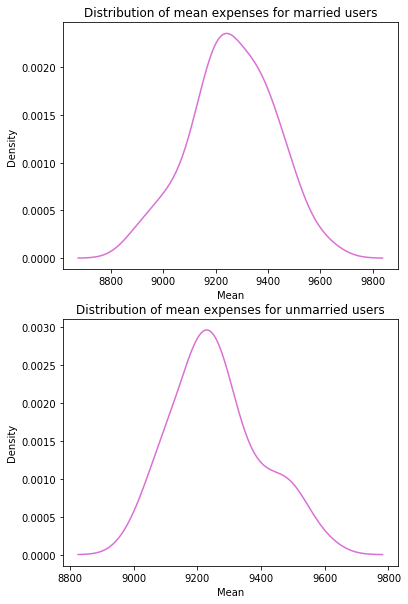

In [26]:
# Taking samples of 1000 entries for married and unmarried people and
# Creating kde plots to check if it appears gaussian.
plt.figure(figsize=(6,10))
x = 1
for j in [1,0]:
    means = []
    for i in range(100):
        temp = df.loc[df['Marital_Status']==j,'Purchase'].sample(1000)
        avg = temp.mean()
        means.append(avg)
    plt.subplot(2,1,x)
    sns.kdeplot(x = means, color = 'orchid')
    if j == 0:
        ms = 'unmarried'
        means_mr = means
    else:
        ms = 'married'
        means_umr = means
    plt.title('Distribution of mean expenses for {m} users'.format(m = ms), fontsize = 12)
    plt.xlabel('Mean')
    x += 1
plt.show()

In [27]:
# Finding different confidence intervals for mean expense by married and unmarried customers
for i in ['married', 'unmarried']:
    print('For {m}-'.format(m = i))
    if i == 'married':
        means = means_mr
        ms = 1
    else:
        means = means_umr
        ms = 0
    print('Mean of sample means =',np.mean(means))
    print('Population mean =', np.mean(df.loc[df['Marital_Status']==ms, 'Purchase']))
    print('Standard deviation of means (Standard Error) =', np.std(means))
    print('Standard deviation of population =',df.loc[df['Marital_Status']==ms, 'Purchase'].std() )
    print('99% CONFIDENCE INTERVAL for mean expense by {m} users-'.format(m = i))
    print((np.percentile(means, 0.5).round(2), np.percentile(means, 99.5).round(2)))
    print('95% CONFIDENCE INTERVAL for mean expense by {m} users-'.format(m = i))
    print((np.percentile(means, 2.5).round(2), np.percentile(means, 97.5).round(2)))
    print('90% CONFIDENCE INTERVAL for mean expense by {m} users-'.format(m = i))
    print((np.percentile(means, 5).round(2), np.percentile(means, 95).round(2)))
    print('-'*50)

For married-
Mean of sample means = 9260.78608
Population mean = 9261.174574082374
Standard deviation of means (Standard Error) = 138.63163189710204
Standard deviation of population = 5016.89737779313
99% CONFIDENCE INTERVAL for mean expense by married users-
(8995.68, 9595.21)
95% CONFIDENCE INTERVAL for mean expense by married users-
(9037.33, 9545.99)
90% CONFIDENCE INTERVAL for mean expense by married users-
(9053.71, 9503.11)
--------------------------------------------------
For unmarried-
Mean of sample means = 9262.887920000001
Population mean = 9265.907618921507
Standard deviation of means (Standard Error) = 158.90621483892193
Standard deviation of population = 5027.347858674457
99% CONFIDENCE INTERVAL for mean expense by unmarried users-
(8889.31, 9620.32)
95% CONFIDENCE INTERVAL for mean expense by unmarried users-
(8928.08, 9556.5)
90% CONFIDENCE INTERVAL for mean expense by unmarried users-
(8982.69, 9498.42)
--------------------------------------------------


- Mean expense by married customers is 9261.17
- Mean expense by unmarried customers is 9265.90
- There's is overlap between 90%, 95% and 99% confidence intervals for both.
- We don't have enough statistical evidence to compare their expenses.

3. For different age groups-

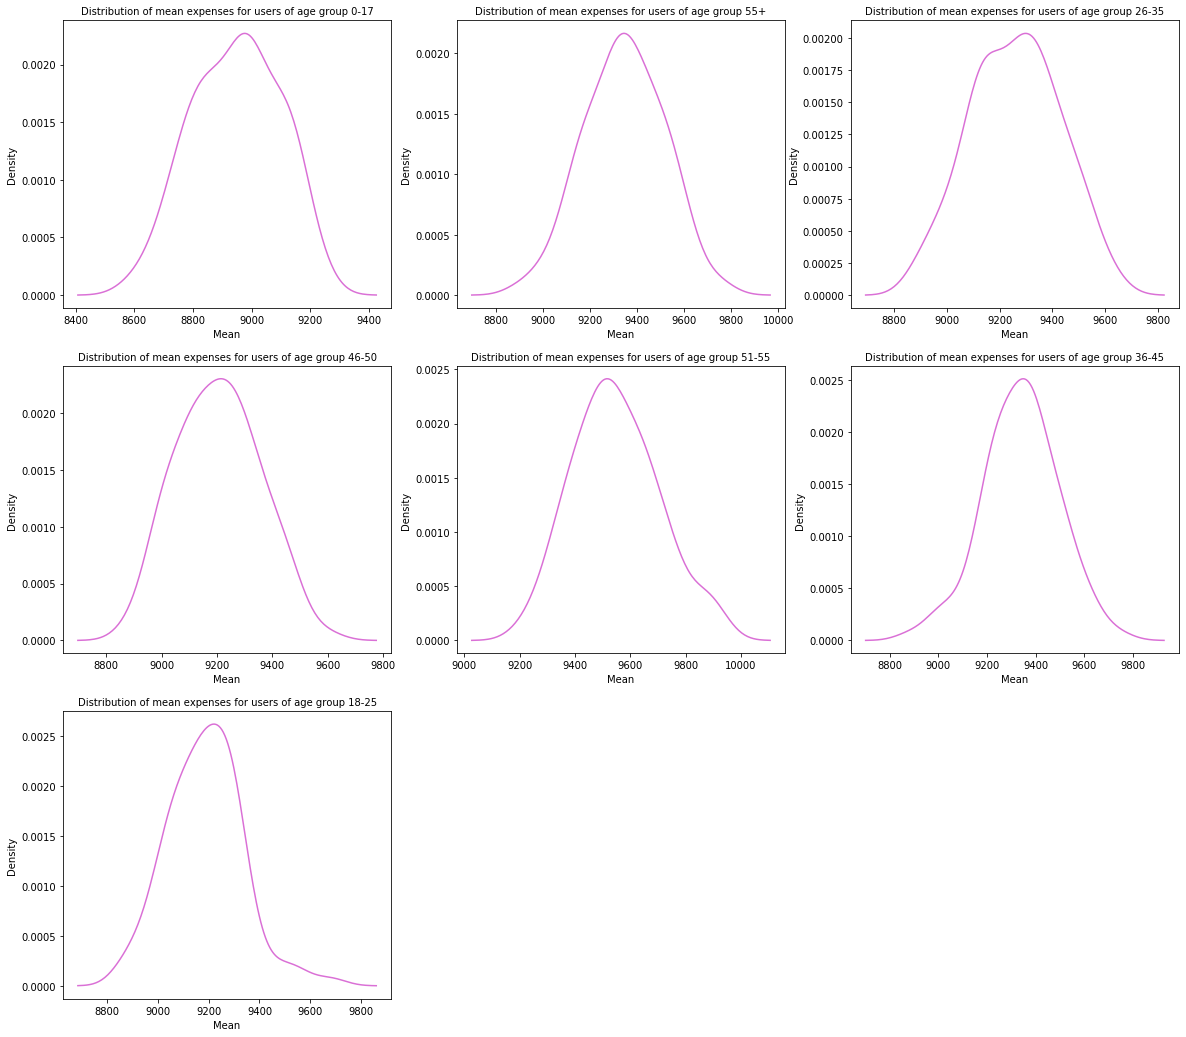

In [28]:
# Taking 100 samples of 1000 entries for each age group and
# Plotting KDE plots to see if their distribution looks gaussian
plt.figure(figsize=(20,18))
x = 1
for j in ['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']:
    means = []
    for i in range(100):
        temp = df.loc[df['Age']==j,'Purchase'].sample(1000)
        avg = temp.mean()
        means.append(avg)
    plt.subplot(3,3,x)
    sns.kdeplot(x = means, color = 'orchid')
    if j == '0-17':
        means_0 = means
    elif j == '55+':
        means_55 = means
    elif j == '26-35':
        means_26 = means
    elif j == '46-50':
        means_46 = means
    elif j == '51-55':
        means_51 = means
    elif j == '36-45':
        means_36 = means
    else:
        means_18 = means
    plt.title('Distribution of mean expenses for users of age group {a}'.format(a = j), fontsize=10)
    plt.xlabel('Mean')
    x += 1
plt.show()

In [29]:
# Finding confidence intervals for mean purchase for each age group
for i in ['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']:
    print('For {m}-'.format(m = i))
    if i == '0-17':
        means = means_0
    elif i == '55+':
        means = means_55
    elif i == '26-35':
        means = means_26
    elif i == '46-50':
        means = means_46
    elif i == '51-55':
        means = means_51
    elif i == '36-45':
        means = means_36
    else:
        means = means_18

    print('Mean of sample means =',np.mean(means))
    print('Population mean =', np.mean(df.loc[df['Age']==i, 'Purchase']))
    print('Standard deviation of means (Standard Error) =', np.std(means))
    print('Standard deviation of population =',df.loc[df['Age']==i, 'Purchase'].std() )
    print('99% CONFIDENCE INTERVAL for mean expense by users of age group {a}-'.format(a = i))
    print((np.percentile(means, 0.5).round(2), np.percentile(means, 99.5).round(2)))
    print('95% CONFIDENCE INTERVAL for mean expense by users of age group {a}-'.format(a = i))
    print((np.percentile(means, 2.5).round(2), np.percentile(means, 97.5).round(2)))
    print('90% CONFIDENCE INTERVAL for mean expense by users of age group {a}-'.format(a = i))
    print((np.percentile(means, 5).round(2), np.percentile(means, 95).round(2)))
    print('-'*50)

For 0-17-
Mean of sample means = 8947.30677
Population mean = 8933.464640444974
Standard deviation of means (Standard Error) = 148.29868192393727
Standard deviation of population = 5111.11404600277
99% CONFIDENCE INTERVAL for mean expense by users of age group 0-17-
(8611.12, 9235.0)
95% CONFIDENCE INTERVAL for mean expense by users of age group 0-17-
(8675.05, 9190.8)
90% CONFIDENCE INTERVAL for mean expense by users of age group 0-17-
(8701.66, 9169.15)
--------------------------------------------------
For 55+-
Mean of sample means = 9344.416439999999
Population mean = 9336.280459449405
Standard deviation of means (Standard Error) = 168.09360697845239
Standard deviation of population = 5011.493995603418
99% CONFIDENCE INTERVAL for mean expense by users of age group 55+-
(8937.09, 9739.1)
95% CONFIDENCE INTERVAL for mean expense by users of age group 55+-
(9014.9, 9630.73)
90% CONFIDENCE INTERVAL for mean expense by users of age group 55+-
(9088.9, 9609.07)
--------------------------

Observations-
- 99% Confidence Interval for 0-17 is less than 51-55 without overlap.
- We can say with 99% confidence that expense of 0-17 is less compared to expense of 51-55 ages.

Insights-
- Ads for products which cost between 9225 to 9908 can be targetted towards 51–55 year old customers.
- Ads for products which cost between 8611 to 9235 can be targetted towards 0–17 year old customers.

# Final Insights and Recommendations

Insights- 
- Walmart can keep products like P00265242 and P00025442 (which are selling a lot) in the inventory. Products like P00056342       P00350742 (which are not selling) need not be kept in store.
- Ads can be targetted towards people of age group 26-35, since they are making maximum purchases. Walmart can also include new products required by people of this age group.
- Ads can be targetted towards people of city category B. Inventory in these cities can be replenished.
- Ads can be targetted towards people who have spent between 1 to 2 years in their cities.
- Ads can be targetted towards unmarried people.
- Products of categories 1, 5 and 8 can be kept in inventory as well as made easily visible in the stores.
- Offers/rewards can be given on purchases above 12000 dollars to nudge customers to make more purchases.
- More products popular among people with occupations 0, 4 and 7 can be kept in store.
- Ads for slightly expensive products can be targetted towards people with occupation 12 and 17. (See median expenses of all occupations below)
- Ads for products which cost between 9151 and 9790 can be targetted towards males.
- Ads for products which cost between 8507 and 9051 can be targetted towards females.
- Ads for products which cost between 9215 to 9987 can be targetted towards 51-55 year old customers.
- Ads for products which cost between 8591 to 9196 can be targetted towards 0-17 year old customers.

Recommendations-
1. Give offers/rewards on purchases above 12000 to nudge customers to spend more.
2. Target ads towards people of city category B.
3. Target ads towards people who have spent between 1 to 2 years in their city.
4. Target ads towards unmarried people.
5. Target ads for products which cost between 9111 and 9744 towards males.
6. Target ads for products which cost between 8463 and 9073 towards females.
7. Target ads for products which cost between 9215 to 9987 towards 51-55 year old customers.
8. Target ads for products which cost between 8591 to 9196 towards 0-17 year old customers.